In [1]:
import numpy as np
length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [2]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
knr = KNeighborsRegressor()
length = length.reshape(-1,1)

In [3]:
knr.fit(length,weight)

KNeighborsRegressor()

In [4]:
predict = knr.predict([[50]])
predict

array([1040.])

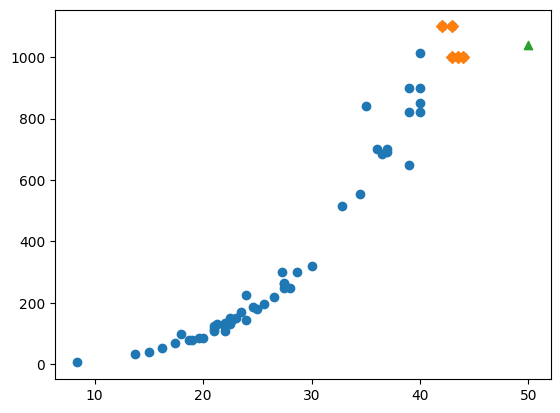

In [5]:
# 길이가 50일때 무게는 얼마일까?
import matplotlib.pyplot as plt
distance,indexes =  knr.kneighbors([[50]])
plt.scatter(length,weight)
plt.scatter(length[indexes],weight[indexes],marker='D')
plt.scatter(50,1040,marker='^')
plt.show()


In [6]:
predict = knr.predict([[100]])
predict

array([1040.])

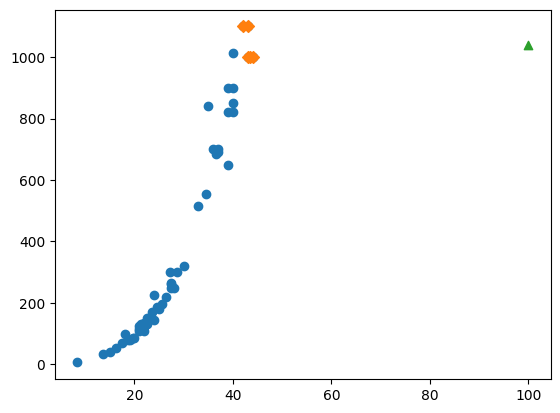

In [7]:
import matplotlib.pyplot as plt
distance,indexes =  knr.kneighbors([[100]])
plt.scatter(length,weight)
plt.scatter(length[indexes],weight[indexes],marker='D')
plt.scatter(100,1040,marker='^')
plt.show()

In [8]:
predict = knr.predict([[1000]])
predict

array([1040.])

선형 회귀

In [9]:
# y = ax + b
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# 모델
lr = LinearRegression()
# 데이터분할
x_train,x_test,y_train,y_test = train_test_split(length,weight,random_state=42)
# 학습
lr.fit(x_train,y_train)
# 평가
lr.score(x_test,y_test)

0.8247503123313558

In [10]:
lr.coef_, lr.intercept_

(array([39.01714496]), -709.0186449535477)

In [11]:
# 길이는 0~50
x = np.arange(15,51)
y = []
for i in x:
  y.append(lr.predict(np.array(i).reshape(-1,1)))

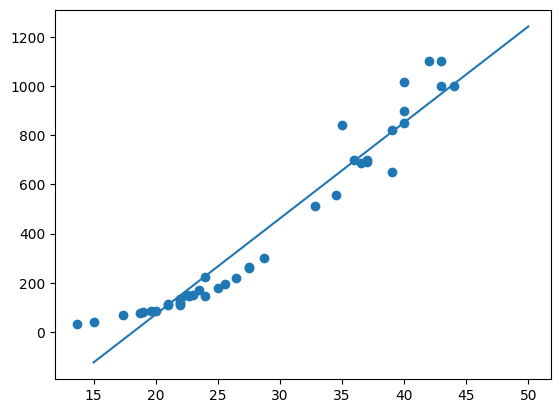

In [12]:
plt.scatter(x_train,y_train)
plt.plot(x,y)

In [13]:
# 길이가 50일때 무게는?
lr.predict([[50]]), lr.predict([[100]]),lr.predict([[3]])

(array([1241.83860323]), array([3192.69585141]), array([-591.96721006]))

다항 회귀
  - y = β₀ + β₁x + β₂x² + ... + βₙxⁿ

In [14]:
length_poly =  np.column_stack( (length**2, length))

In [15]:
x_train,x_test,y_train,y_test = train_test_split(length_poly, weight)

In [16]:
lr = LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

0.9637359716442603

In [17]:
lr.coef_,lr.intercept_

(array([  0.98394223, -20.2987256 ]), 107.23350697229478)

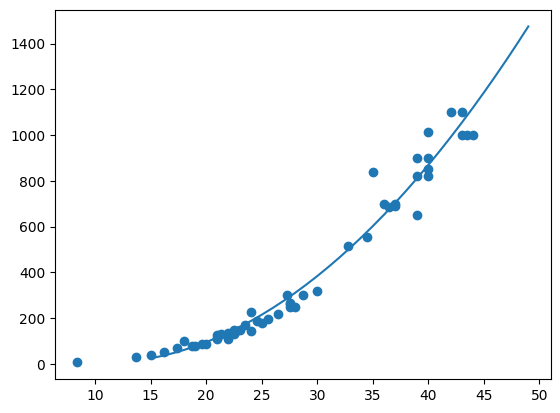

In [18]:
point = np.arange(15,50)
plt.scatter(length,weight)
plt.plot(point, lr.coef_[0]*(point**2) + lr.coef_[1]*point + lr.intercept_)
plt.show()

In [19]:
# 선형 회귀, 다항 회귀, 다중 회귀

In [20]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/leekyuyoung20230313/pythone/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/data/data1.csv')
df.head()

,length,height,width
0,8.4,2.11,1.41
1,13.7,3.53,2.00
2,15.0,3.82,2.43
3,16.2,4.59,2.63
4,17.4,4.59,2.94


In [21]:
len(df), len(weight)

(56, 56)

In [22]:
# 모델 적용. 평가
lr = LinearRegression()
x = df.to_numpy()
y = weight
x.shape, y.shape


((56, 3), (56,))

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42)
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

0.8796419177546366

In [24]:
lr.coef_, lr.intercept_

(array([ 9.07538153, 69.46401443, 38.00385678]), -599.1708082981097)

In [25]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
poly.fit([[2,3]])
poly.transform([[2,3]])
# 1(bias) 2,3,2^2, 2*3, 3^2

array([[1., 2., 3., 4., 6., 9.]])

In [26]:
poly = PolynomialFeatures(degree=3)
poly.fit([[2,3]])
poly.transform([[2,3]])
# 1(bias) 2,3,2^2, 2*3, 3^2, 2^3, 2^2*3, 3^2*2, 3^3

array([[ 1.,  2.,  3.,  4.,  6.,  9.,  8., 12., 18., 27.]])

In [27]:
# 데이터 준비
x =  df.to_numpy()
y = weight
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42)

In [28]:
poly = PolynomialFeatures(include_bias=False)
poly.fit(x_train)
x_trian_poly = poly.transform(x_train)
x_train.shape, x_trian_poly.shape

((42, 3), (42, 9))

In [29]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [30]:
x_test_poly = poly.transform(x_test)

In [31]:
# 다중 회귀 모델 훈련
lr = LinearRegression()
lr.fit(x_trian_poly,y_train)

LinearRegression()

In [32]:
lr.score(x_test_poly,y_test)

0.9714559911594111

In [33]:
# 특성을 더 많이 만들기... degree = 5
poly = PolynomialFeatures(degree=5,include_bias=False)
poly.fit(x_train)
x_train_poly5 =  poly.transform(x_train)
x_test_poly5 = poly.transform(x_test)

In [34]:
lr = LinearRegression()
lr.fit(x_train_poly5,y_train)

LinearRegression()

In [35]:
# overfit 과대적합
lr.score(x_train_poly5,y_train), lr.score(x_test_poly5,y_test)

(0.9999999999996433, -144.40579436844948)

규제 - 과적합을 방지하기 위한 방법으로 일종의 패널티를 부여
   - 규제 알고리즘을 적용하기 전에 표준화
   - L1 : 라소 - 오차 MSE + alpha(규제강도) x 회귀계수의 제곱합
   - L2 : 리지 - 오차 MSE + alpha(규제강도) x 회귀계수의 절대값의합
   - 특성의 중요도가 전체적으로 비슷한경우 : 리지
   - 일부만 중요하거나 분석하기 쉬운모델 : 라소
   - 중요포인트 : 적절한 규제강도 찾기

In [41]:
# 표준화
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(x_train_poly5)
x_train_poly5_scaled = ss.transform(x_train_poly5)
x_test_poly5_scaled = ss.transform(x_test_poly5)

In [42]:
# 리지 회귀
from sklearn.linear_model import Ridge
rd = Ridge()
rd.fit(x_train_poly5_scaled,y_train)
rd.score(x_train_poly5_scaled,y_train), rd.score(x_test_poly5_scaled,y_test)

(0.9896101671037343, 0.9790693977615387)

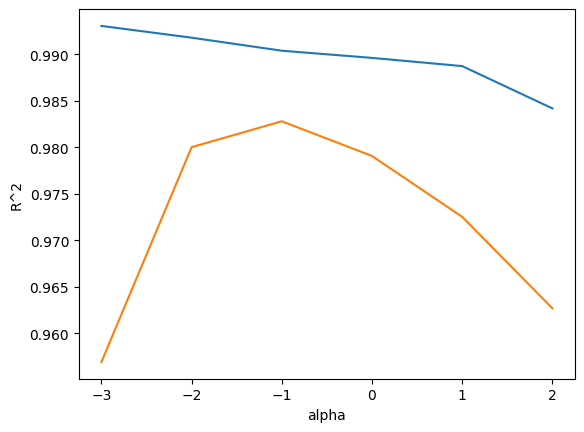

In [43]:
# 적절한 규제 강도 찾기 - 알파값을 조정 : 수치를조정함으로 인해서 성능향샹을 도모하는 것을 하이퍼 파라메터 튜닝
alpha_list = [0.001,0.01,0.1,1,10,100]
train_score, test_score = [],[]
for alpha in alpha_list:
  rd = Ridge(alpha=alpha)
  rd.fit(x_train_poly5_scaled,y_train)
  train_score.append(rd.score(x_train_poly5_scaled,y_train))
  test_score.append(rd.score(x_test_poly5_scaled,y_test))
plt.plot(np.log10(alpha_list),train_score)  
plt.plot(np.log10(alpha_list),test_score)  
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [44]:
rd = Ridge(alpha=0.1)
rd.fit(x_train_poly5_scaled,y_train)
rd.score(x_train_poly5_scaled,y_train), rd.score(x_test_poly5_scaled,y_test)

(0.9903815817570367, 0.9827976465386928)

In [ ]:
# 라쏘 - 숙제
from sklearn.linear_model import Lasso